### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from dermclass_structured.train_pipeline import run
from dermclass_structured.predict import make_prediction

### Initial EDA (To be extended)

In [2]:
df = pd.read_csv("../src/dermclass_structured/dermclass_structured/datasets/dermatology_dataset.csv")
print(df.columns)
df.head()

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'pnl_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'age', 'class'],
      dtype='object')


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [3]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [4]:
x = df.drop("class", 1)
y = df["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

C:\Users\Kajetan\Anaconda3\envs\dermclass\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

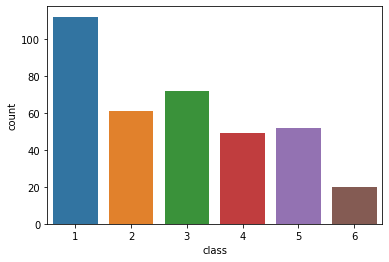

In [5]:
sns.countplot(y)

### Example of helper functions

In [6]:
# Will be added in the future

### Example of 2 main functions

In [7]:
# Train and save the pipeline
run()

2020-10-04 22:49:26,930 — dermclass_structured.train_pipeline — INFO —run:16 — Started training the pipeline
2020-10-04 22:49:26,938 — dermclass_structured.processing.preprocessors — INFO —split_target:16 — Successfully splat the data
2020-10-04 22:49:26,939 — dermclass_structured.processing.preprocessors — INFO —load_data:25 — Successfully loaded the data
2020-10-04 22:49:26,945 — dermclass_structured.processing.preprocessors — INFO —transform:59 — Successfully transformed variables
2020-10-04 22:49:26,979 — dermclass_structured.processing.pipeline — INFO —fit_ppc_pipeline:45 — Successfully fitted the preprocessing pipeline
2020-10-04 22:49:26,983 — dermclass_structured.processing.preprocessors — INFO —transform:59 — Successfully transformed variables
2020-10-04 22:49:26,999 — dermclass_structured.processing.preprocessors — INFO —transform:59 — Successfully transformed variables
2020-10-04 22:49:27,018 — dermclass_structured.processing.pipeline — INFO —tune_hyperparameters:84 — Findin

[I 2020-10-04 22:49:27,020] A new study created in memory with name: XGBRFClassifier
[I 2020-10-04 22:49:28,405] Trial 0 finished with value: 0.5855950627673749 and parameters: {'subsample': 0.4, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'min_child_weight': 7, 'max_depth': 12, 'max_delta_step': 1.6, 'learning_rate': 0.011430983876313222, 'n_estimators': 187, 'gamma': 10.1}. Best is trial 0 with value: 0.5855950627673749.
[I 2020-10-04 22:49:29,101] Trial 1 finished with value: 0.0 and parameters: {'subsample': 0.2, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6, 'min_child_weight': 12, 'max_depth': 8, 'max_delta_step': 0.1, 'learning_rate': 0.09822263016087535, 'n_estimators': 260, 'gamma': 9.2}. Best is trial 0 with value: 0.5855950627673749.
[I 2020-10-04 22:49:30,217] Trial 2 finished with value: 0.47945157444421066 and parameters: {'subsample': 0.6, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.7, 'min_child_weight': 10, 'max_depth': 5, 'max_delta_step': 3.90000000000

2020-10-04 22:49:59,275 — dermclass_structured.processing.pipeline — INFO —tune_hyperparameters:84 — Finding hyperameters for XGBClassifier


[I 2020-10-04 22:49:59,278] A new study created in memory with name: XGBClassifier
[I 2020-10-04 22:50:00,907] Trial 0 finished with value: 0.7670243355073989 and parameters: {'subsample': 0.4, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'min_child_weight': 7, 'max_depth': 12, 'max_delta_step': 1.6, 'learning_rate': 0.011430983876313222, 'n_estimators': 187, 'gamma': 10.1}. Best is trial 0 with value: 0.7670243355073989.
[I 2020-10-04 22:50:02,248] Trial 1 finished with value: 0.0 and parameters: {'subsample': 0.2, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6, 'min_child_weight': 12, 'max_depth': 8, 'max_delta_step': 0.1, 'learning_rate': 0.09822263016087535, 'n_estimators': 260, 'gamma': 9.2}. Best is trial 0 with value: 0.7670243355073989.
[I 2020-10-04 22:50:03,934] Trial 2 finished with value: 0.0 and parameters: {'subsample': 0.6, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.7, 'min_child_weight': 10, 'max_depth': 5, 'max_delta_step': 3.9000000000000004, 'learning_r

2020-10-04 22:50:39,184 — dermclass_structured.processing.pipeline — INFO —tune_hyperparameters:100 — Best params found for: XGBRFClassifier with score: 0.962479837295743
2020-10-04 22:50:39,876 — dermclass_structured.processing.pipeline — INFO —tune_hyperparameters:103 — Successfully tuned hyperparameters
2020-10-04 22:50:39,879 — dermclass_structured.pickles.pickle_handling — INFO —remove_old_pipelines:35 — Start removing old pipelines
2020-10-04 22:50:39,881 — dermclass_structured.pickles.pickle_handling — INFO —remove_old_pipelines:40 — C:\Users\Kajetan\Desktop\dermclass\src\dermclass_structured\dermclass_structured\pickles\structured_pipeline_0.1.0.pkl removed
2020-10-04 22:50:39,882 — dermclass_structured.pickles.pickle_handling — INFO —remove_old_pipelines:35 — Start removing old pipelines
2020-10-04 22:50:39,908 — dermclass_structured.pickles.pickle_handling — INFO —save_pipeline:20 — Saved pipeline: structured_pipeline_0.1.0.pkl, to path: C:\Users\Kajetan\Desktop\dermclass\src

In [15]:
make_prediction(x_test)

2020-10-04 22:51:38,443 — dermclass_structured.processing.validation — INFO —validate_inputs:20 — Successfully validated input data
2020-10-04 22:51:38,457 — dermclass_structured.pickles.pickle_handling — INFO —load_pipeline:28 — structured_pipeline_0.1.0.pkl loaded
2020-10-04 22:51:38,463 — dermclass_structured.processing.preprocessors — INFO —transform:59 — Successfully transformed variables
2020-10-04 22:51:38,501 — dermclass_structured.predict — INFO —make_prediction:27 — Made predictions with model version: 0.1.0 Inputs:      erythema  scaling  definite_borders  itching  koebner_phenomenon  \
193         2        2                 2        0                   0   
33          2        2                 1        0                   0   
15          1        1                 0        1                   3   
310         3        2                 2        0                   0   
57          2        1                 1        3                   0   
..        ...      ...        

array([1, 1, 4, 1, 3, 1, 2, 1, 1, 6, 3, 1, 1, 1, 2, 3, 2, 1, 1, 5, 4, 1,
       3, 3, 1, 2, 4, 1, 1, 4, 1, 3, 1, 5, 3, 3, 1, 5, 6, 4, 1, 2, 1, 5,
       1, 1, 2, 2, 2, 3, 1, 2, 1, 5, 1, 5, 1, 1, 2, 1, 1, 3, 2, 4, 5, 5,
       5, 1, 5, 2, 3, 3, 4, 1], dtype=int64)

### Evaluate results

In [12]:
print(accuracy_score(y_test, predictions))

0.9594594594594594


In [13]:
print(confusion_matrix(y_test, predictions))

[[31  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  1 12  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  2]]


In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.75      1.00      0.86         9
           3       1.00      0.92      0.96        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      0.67      0.80         3

    accuracy                           0.96        74
   macro avg       0.96      0.91      0.93        74
weighted avg       0.97      0.96      0.96        74

